# Exploration Notebook

## Specify Data Source

In [128]:
from config import *

In [129]:
dataset_path = DATA_PATH

In [130]:
hungry = dataset_path + 'hungry'

In [131]:
hungry

'../data/raw/donateacry_corpus_cleaned_and_updated_data/hungry'

## Load Data

### Check Contents of Data Sub Folders

In [132]:
import os
import librosa
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import IPython.display as ipd

In [133]:

audio_files = os.listdir(hungry)
print('Number of audio files in hungry folder: ', len(audio_files))

Number of audio files in hungry folder:  382


In [134]:
burping = dataset_path + 'burping'
audio_files = os.listdir(burping)
print('Number of audio files in burping folder: ', len(audio_files))

Number of audio files in burping folder:  8


In [135]:
discomfort = dataset_path + 'discomfort'
audio_files = os.listdir(discomfort)
print('Number of audio files in discomfort folder: ', len(audio_files))

Number of audio files in discomfort folder:  27


In [136]:
tired = dataset_path + 'tired'
audio_files = os.listdir(tired)
print('Number of audio files in tired folder: ', len(audio_files))

Number of audio files in tired folder:  24


In [137]:
belly_pain = dataset_path + 'belly_pain'
audio_files = os.listdir(belly_pain)
print('Number of audio files in belly_pain folder: ', len(audio_files))

Number of audio files in belly_pain folder:  16


### Load in an Audio Sample to Visualise

#### Load audio file

In [138]:
audio_file = hungry + HUNGRY_TEST_SAMPLE
audio_data, sample_rate = librosa.load(audio_file, sr=None)

In [139]:
print('Audio data: ', audio_data)
print('Sampling rate: ', sample_rate)
print('Audio duration: ', len(audio_data)/sample_rate, 'seconds')


Audio data:  [0.         0.         0.         ... 0.02679443 0.09161377 0.074646  ]
Sampling rate:  8000
Audio duration:  6.84 seconds


#### Visualise Audio Waveform

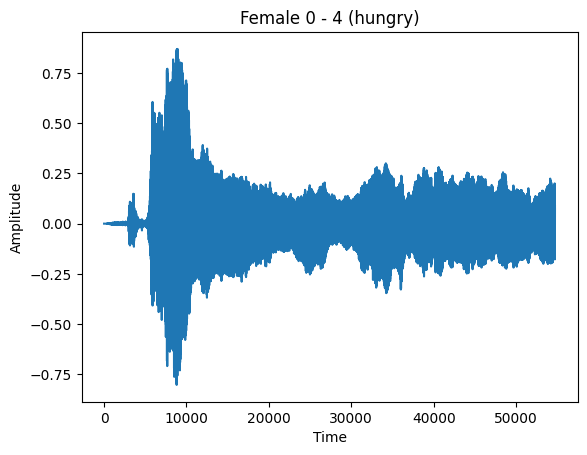

In [140]:
plt.plot(audio_data)
plt.title('Female 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Spectrogram to visualise Frequency Content Over Time

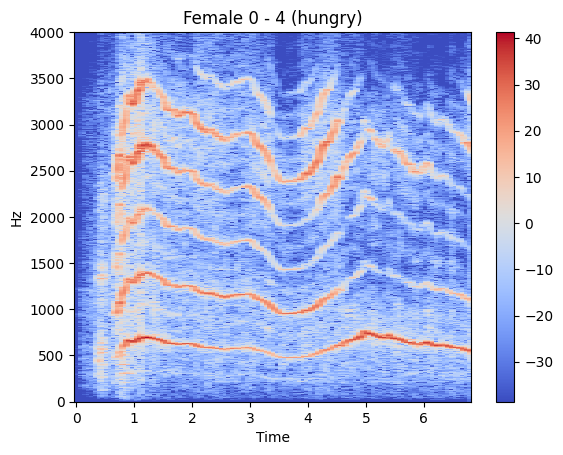

In [141]:
X = librosa.stft(audio_data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Female 0 - 4 (hungry)')
plt.show()


### Compare Two Waveforms from Same Category to Observe Similarities

#### Load Audio File From Same Sub Folder

In [142]:
audio_file2 = hungry + '/0D1AD73E-4C5E-45F3-85C4-9A3CB71E8856-1430742197-1.0-m-04-hu.wav'
y2, sample_rate2 = librosa.load(audio_file, sr=None)

##### Extract MFCCs for Both Audio Files

In [143]:
mfccs1 = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
mfccs2 = librosa.feature.mfcc(y=y2, sr=sample_rate2, n_mfcc=13)

#### Compute cosine similarity and compute Average Similarity

In [144]:
similarity_matrix = cosine_similarity(mfccs1.T, mfccs2.T)
average_similarity = similarity_matrix.mean()

In [145]:
print("Average Cosine Similarity:", average_similarity)
# An average cosine similarity close to 1 means that the two audio files are similar

Average Cosine Similarity: 0.8842284


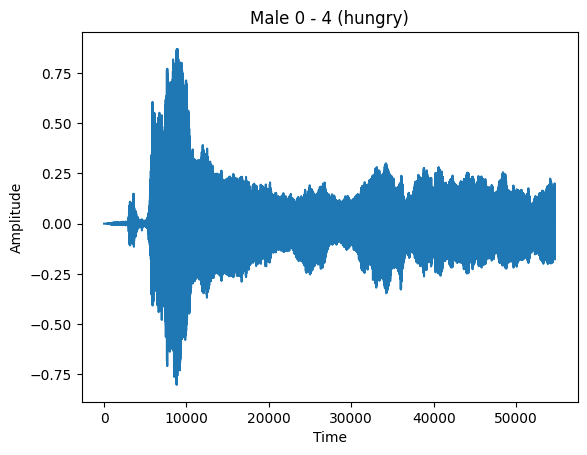

In [146]:
plt.plot(y2)
plt.title('Male 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

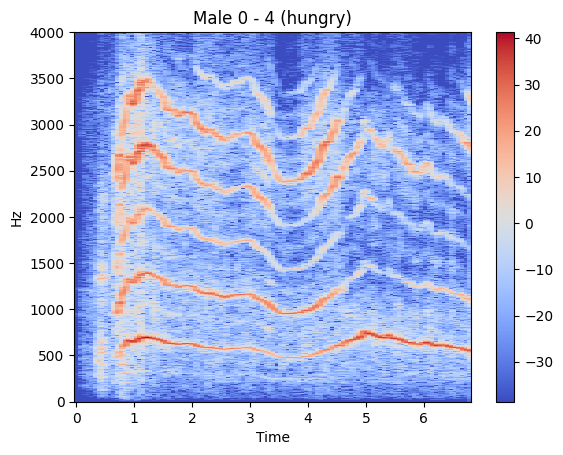

In [147]:
X = librosa.stft(y2)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate2, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Male 0 - 4 (hungry)')
plt.show()

#### Compare a Hungry cry to a Burping cry

In [148]:
burping = dataset_path + 'burping'
audio_file3 = burping + '/F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav'
y3, sample_rate3 = librosa.load(audio_file3, sr=None)


In [149]:
mfccs3 = librosa.feature.mfcc(y=y3, sr=sample_rate3, n_mfcc=13)

In [150]:
similarity_matrix = cosine_similarity(mfccs1.T, mfccs3.T)
average_similarity2 = similarity_matrix.mean()

In [151]:
print("Average Cosine Similarity:", average_similarity2)
# An average cosine similarity close to 1 means that the two audio files are similar (in this case, they are not)

Average Cosine Similarity: 0.82843083


In [152]:
print(sample_rate, sample_rate2, sample_rate3)

8000 8000 8000


In [153]:

audio_file4 = burping + '/F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav'
original_audio, original_sr = librosa.load(audio_file4, sr=None)

# Upsample the audio to the desired sampling rate
target_sr = 44100  # Example: desired sampling rate
resampled_audio = librosa.resample(original_audio, orig_sr=original_sr, target_sr=target_sr)


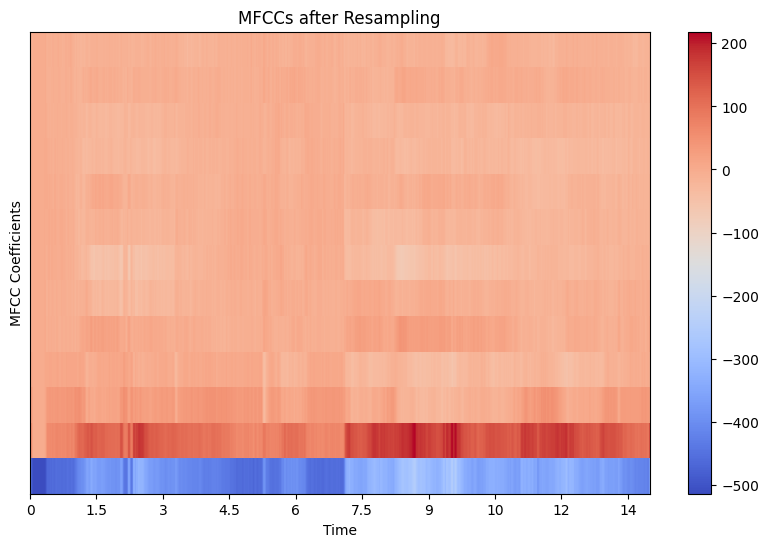

In [154]:
# Extract MFCCs from the resampled audio
# https://medium.com/@tanveer9812/mfccs-made-easy-7ef383006040
mfccs = librosa.feature.mfcc(y=resampled_audio, sr=target_sr, n_mfcc=13)

# Visualize the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs after Resampling')
plt.ylabel('MFCC Coefficients')
plt.xlabel('Time')
plt.show()


## Data Augmentation Technique Exploration
* Noise injection
* Time Shift
* Pitch Shift
* Time Compress
* Time Stretch

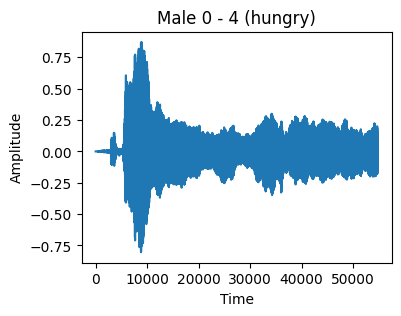

In [155]:
# before augmentation
plt.figure(figsize=(4, 3))
plt.plot(audio_data)
plt.title('Male 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [156]:
# play the original audio
ipd.Audio(audio_data, rate=sample_rate)

### Noise Injection Example ###

* https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6

In [157]:
import numpy as np

def inject_noise(audio_data, noise_factor):
    noise = np.random.randn(len(audio_data))
    augmented_data = audio_data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(audio_data[0]))
    return augmented_data

In [158]:
augmented_data_noise = inject_noise(audio_data, 0.015)

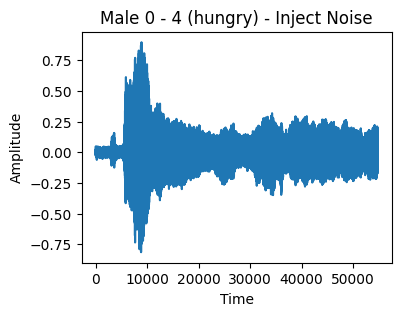

In [159]:
plt.figure(figsize=(4, 3))
plt.plot(augmented_data_noise)
plt.title('Male 0 - 4 (hungry) - Inject Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [160]:
# play the augmented audio
ipd.Audio(augmented_data_noise, rate=sample_rate)

### Time Shift Example

In [161]:
def shift_time(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

In [162]:
augemented_data_time_shifted = shift_time(audio_data, sample_rate, 0.5, 'right')

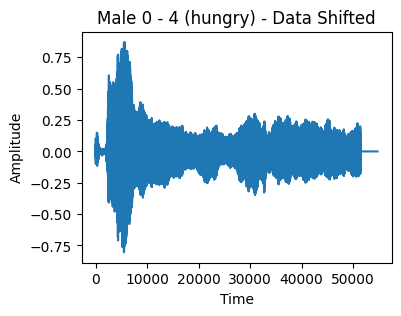

In [163]:
plt.figure(figsize=(4, 3))
plt.plot(augemented_data_time_shifted)
plt.title('Male 0 - 4 (hungry) - Data Shifted')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [164]:
# play the augmented audio
import IPython.display as ipd
ipd.Audio(augemented_data_time_shifted, rate=sample_rate)


### Pitch Shift Example

In [165]:
from librosa.effects import pitch_shift

In [166]:
shift_pitched_data = pitch_shift(audio_data, sr=sample_rate, n_steps=2)

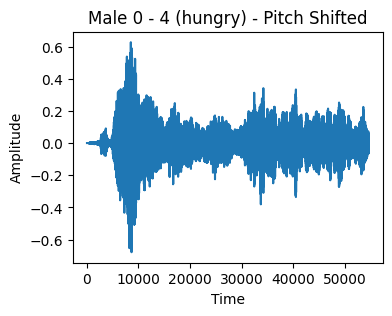

In [167]:
plt.figure(figsize=(4, 3))
plt.plot(shift_pitched_data)
plt.title('Male 0 - 4 (hungry) - Pitch Shifted')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [168]:
# play the augmented audio
ipd.Audio(shift_pitched_data, rate=sample_rate)

### Time Stretch Example

In [169]:
time_stretched_data = librosa.effects.time_stretch(audio_data, rate=0.8)

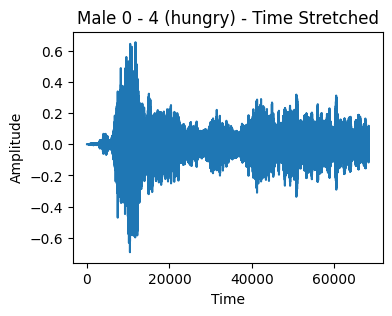

In [170]:
plt.figure(figsize=(4, 3))
plt.plot(time_stretched_data)
plt.title('Male 0 - 4 (hungry) - Time Stretched')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [171]:
# play the augmented audio
ipd.Audio(time_stretched_data, rate=sample_rate)

### Time Compression Example

In [172]:
time_compress_data = librosa.mu_compress(audio_data, mu=63)

In [173]:
time_compress_data2 = librosa.effects.time_stretch(audio_data, rate=1.2)

In [174]:
len(time_compress_data2)

45600

In [175]:
len(audio_data)

54720

In [176]:
len(time_compress_data)

54720

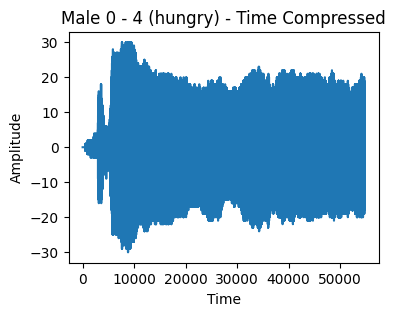

In [177]:
plt.figure(figsize=(4, 3))
plt.plot(time_compress_data)
plt.title('Male 0 - 4 (hungry) - Time Compressed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [179]:
ipd.Audio(time_compress_data, rate=sample_rate)

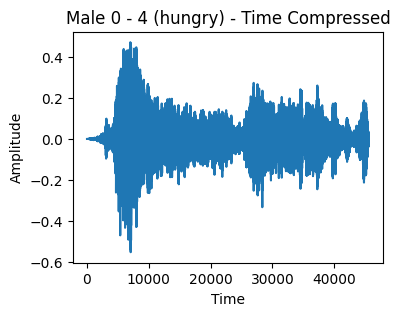

In [197]:
plt.figure(figsize=(4, 3))
plt.plot(time_compress_data2)
plt.title('Male 0 - 4 (hungry) - Time Compressed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [180]:
ipd.Audio(time_compress_data2, rate=sample_rate)

#### Stretching using AudioStretchy

In [187]:
audio_file

'../data/raw/donateacry_corpus_cleaned_and_updated_data/hungry/0a983cd2-0078-4698-a048-99ac01eb167a-1433917038889-1.7-f-04-hu.wav'

In [192]:
import audiostretchy
from audiostretchy.stretch import stretch_audio

stretch_audio(audio_file, "output.wav", ratio=1.1)

In [193]:
aud_stretch, sr = librosa.load(audio_file, sr=None)

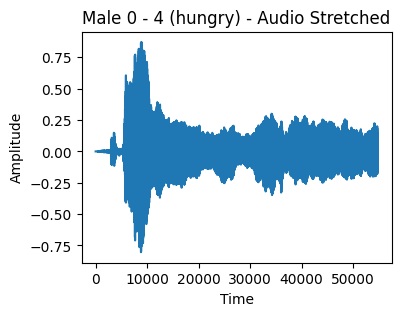

In [195]:
plt.figure(figsize=(4, 3))
plt.plot(aud_stretch)
plt.title('Male 0 - 4 (hungry) - Audio Stretched')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [196]:
# play the augmented audio
ipd.Audio('output.wav', rate=sample_rate)